# Отчет по практическому заданию №1: Подготовка набора данных
---

Дисциплина: Системы искусственного интеллекта и большие данные

Студент: Платон Евгения Евгеньевна

Группа: КВБО-14-24
  
Преподаватель: Питинов Артем Вадимович



# **1. Цель работы**

Целью данного задания является выполнение основных этапов подготовки набора данных для последующего анализа и построения модели машинного обучения. В рамках работы проведены: загрузка данных, разведочный анализ (EDA), визуализация, предварительная обработка и конструирование/отбор признаков. В качестве источника данных был выбран набор дат «Набор данных об утверждении кредита» с платформой Kaggle, независимой информации о заявках на кредит и возможности по ним.

# **2. Выбор и описание набора данных**

Название набора дат: Набор данных об одобрении кредита

---

Источник: Kaggle

---


Описание: Датасет содержит данные о клиентах, подавших заявки на получение кредита. Включает демографические, финансовые и поведенческие показатели, а также целевую переменную — одобрение кредита.

---


Цель: Проанализировать факторы, влияющие на решение по кредиту, и подготовить данные для построения модели классификации.

# **3. Загрузка данных**
Этап загрузки данных является первым шагом в любом аналитическом процессе. Он заключается в получении доступа к набору данных и его импорте в среду выполнения (в данном случае, Google Colab) в формате, удобном для последующей обработки. Мы использовали библиотеку pandas для работы с табличными данными и kagglehub для прямой загрузки датасета с платформы Kaggle без необходимости скачивать его вручную.

**3.1. Установка зависимостей**

In [225]:
!pip install kagglehub pandas matplotlib seaborn scikit-learn



**Эта команда устанавливает библиотеки:**

- kagglehub (для загрузки)

- pandas (для работы с данными)

- matplotlib и seaborn (для визуализации)

- scikit-learn (для возможной предобработки и отбора признаков).

**3.2**. **Загрузка датасета**

In [226]:
import kagglehub
import pandas as pd
import os
import glob

try:
    print("Загружаем датасет...")
    path = kagglehub.dataset_download("anishdevedward/loan-approval-dataset")
    print("Путь к датасету:", path)

    # Поиск CSV-файла
    csv_files = glob.glob(os.path.join(path, "**", "*.csv"), recursive=True)
    if csv_files:
        df = pd.read_csv(csv_files[0])
        print(f"\nЗагружен файл: {csv_files[0]}")
    else:
        print("\nCSV-файлы не найдены.")
        df = None

except Exception as e:
    print(f"Ошибка загрузки: {e}")
    df = None

if df is not None:
    print("\nПервые 5 строк:")
    print(df.head())
    print("\nРазмерность:", df.shape)
    print("\nСтолбцы:", df.columns.tolist())
else:
    print("Данные не загружены.")

Загружаем датасет...
Using Colab cache for faster access to the 'loan-approval-dataset' dataset.
Путь к датасету: /kaggle/input/loan-approval-dataset

Загружен файл: /kaggle/input/loan-approval-dataset/loan_approval.csv

Первые 5 строк:
              name              city  income  credit_score  loan_amount  \
0     Allison Hill         East Jill  113810           389        39698   
1     Brandon Hall     New Jamesside   44592           729        15446   
2     Rhonda Smith      Lake Roberto   33278           584        11189   
3  Gabrielle Davis  West Melanieview  127196           344        48823   
4     Valerie Gray         Mariastad   66048           496        47174   

   years_employed  points  loan_approved  
0              27    50.0          False  
1              28    55.0          False  
2              13    45.0          False  
3              29    50.0          False  
4               4    25.0          False  

Размерность: (2000, 8)

Столбцы: ['name', 'city', 'in

Код сначала загружает датасет с Kaggle как ZIP-архив, используя kagglehub. Затем архив распаковывается, и извлечённый CSV-файл читается. Для первичного анализа сразу после загрузки отображаются: несколько первых строк данных, общее количество строк и столбцов, а также перечень названий столбцов. Это позволяет быстро оценить структуру и содержание датасета.

# **4. Разведочный анализ данных (EDA) и визуализация.**
Разведочный анализ позволяет понять основные признаки, показатели пропусков, аномалии и взаимосвязи между переменными.


--- Общая информация ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB
None

--- Пропущенные значения ---
name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

--- Числовые признаки ---
              income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.0000

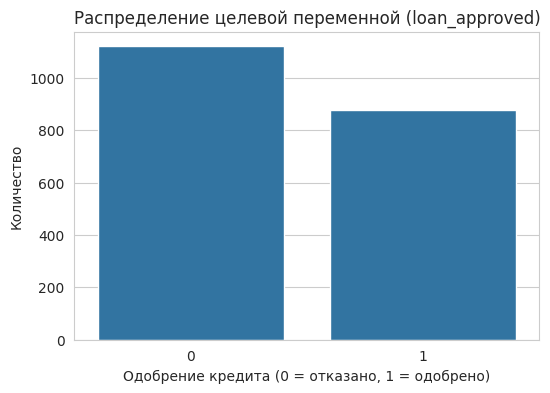

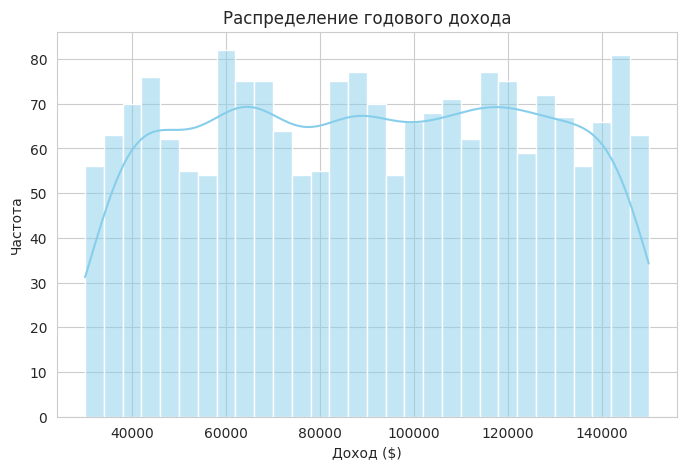

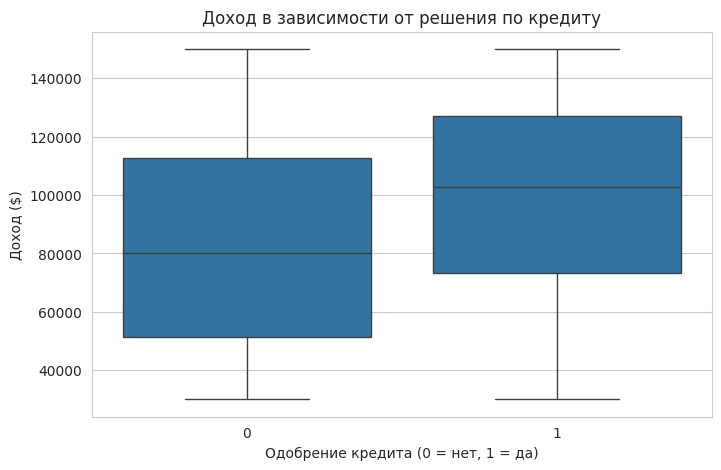

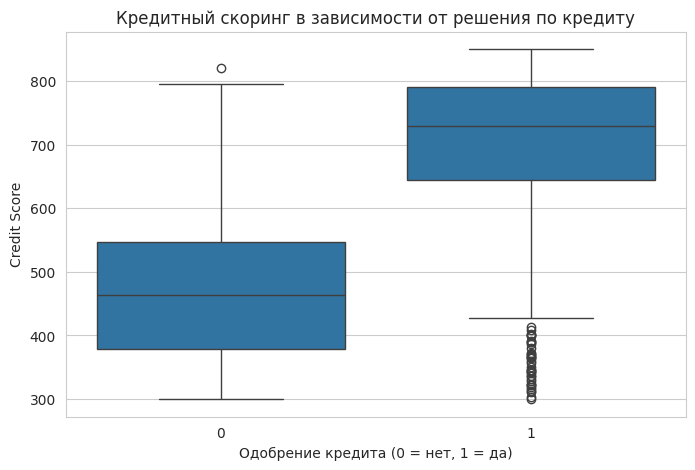

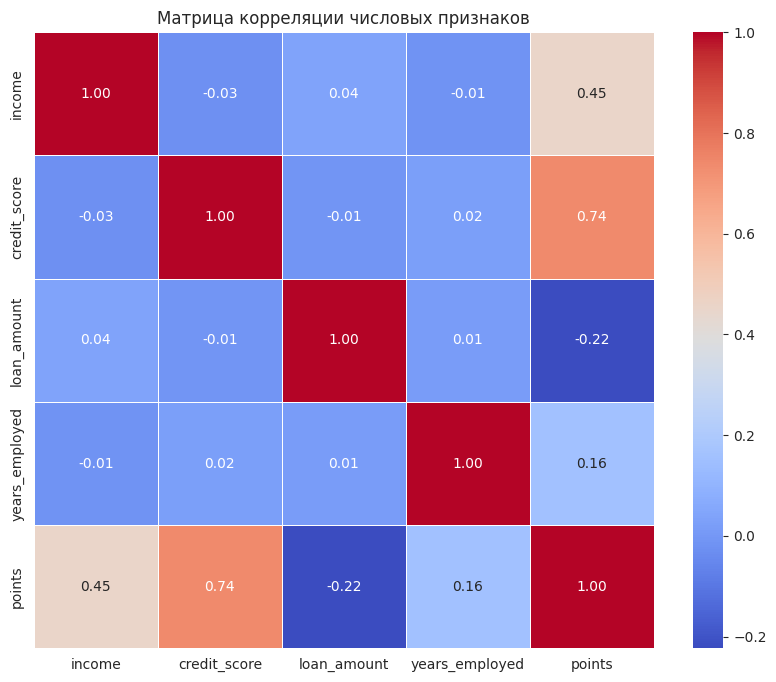

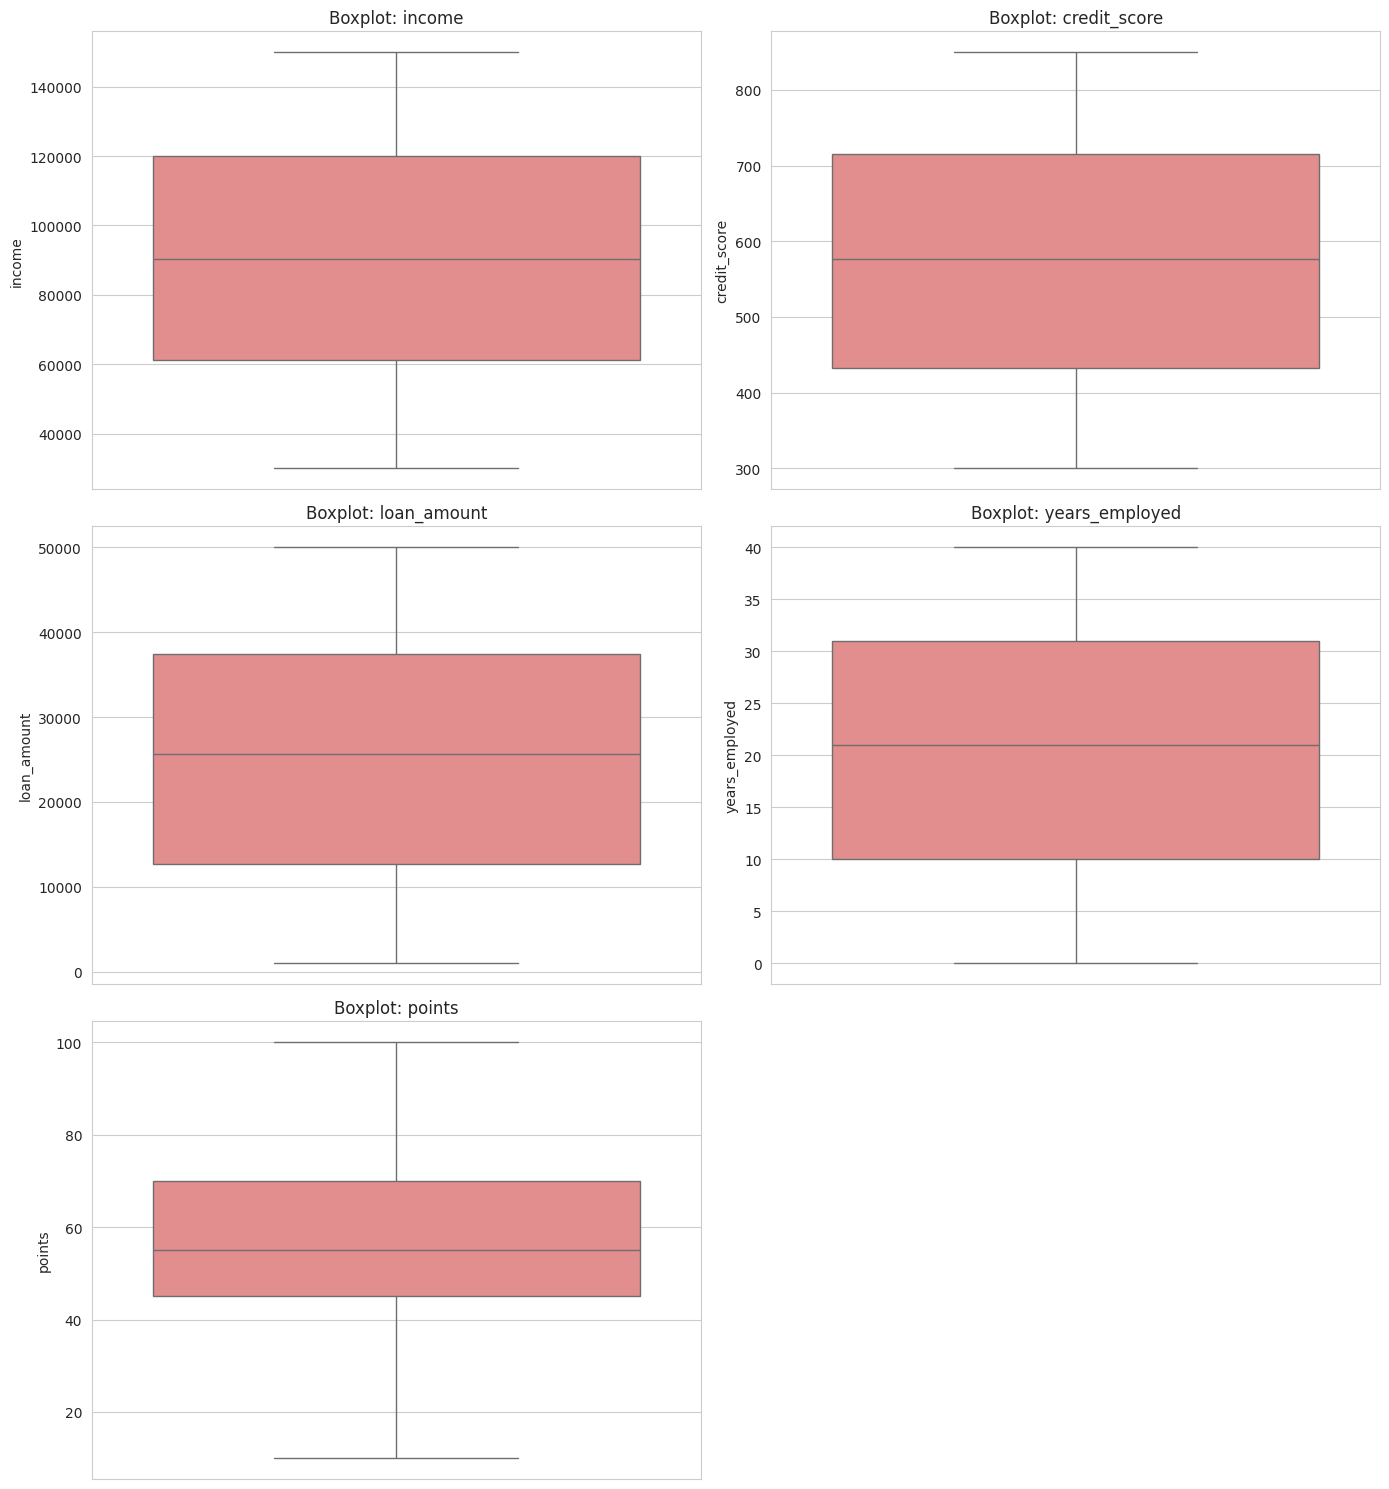

In [227]:
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None:
    print("\n--- Общая информация ---")
    print(df.info())

    print("\n--- Пропущенные значения ---")
    print(df.isnull().sum())

    print("\n--- Числовые признаки ---")
    print(df.select_dtypes(include='number').describe())

    print("\n--- Категориальные признаки ---")
    print(df.select_dtypes(include='object').describe())

    # Визуализация
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style("whitegrid")

    # 1. Распределение целевой переменной
    plt.figure(figsize=(6, 4))
    # Преобразуем bool в int для корректного отображения (0/1)
    sns.countplot(x=df['loan_approved'].astype(int))
    plt.title('Распределение целевой переменной (loan_approved)')
    plt.xlabel('Одобрение кредита (0 = отказано, 1 = одобрено)')
    plt.ylabel('Количество')
    plt.show()

    # 2. Распределение дохода
    plt.figure(figsize=(8, 5))
    sns.histplot(df['income'], bins=30, kde=True, color='skyblue')
    plt.title('Распределение годового дохода')
    plt.xlabel('Доход ($)')
    plt.ylabel('Частота')
    plt.show()

    # 3. Доход и решение по кредиту
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=df['loan_approved'].astype(int), y='income')
    plt.title('Доход в зависимости от решения по кредиту')
    plt.xlabel('Одобрение кредита (0 = нет, 1 = да)')
    plt.ylabel('Доход ($)')
    plt.show()

    # 4. Кредитный рейтинг и решение
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=df['loan_approved'].astype(int), y='credit_score')
    plt.title('Кредитный скоринг в зависимости от решения по кредиту')
    plt.xlabel('Одобрение кредита (0 = нет, 1 = да)')
    plt.ylabel('Credit Score')
    plt.show()

    # 5. Матрица корреляции числовых признаков
    plt.figure(figsize=(10, 8))
    numeric_df = df.select_dtypes(include='number')
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Матрица корреляции числовых признаков')
    plt.show()


    # 6. Визуализация выбросов
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    if numeric_cols:
        n = len(numeric_cols)
        n_cols = 2
        n_rows = (n + n_cols - 1) // n_cols  # округление вверх

        plt.figure(figsize=(14, 5 * n_rows))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.boxplot(y=df[col], color='lightcoral')
            plt.title(f'Boxplot: {col}')
        plt.tight_layout()
        plt.show()
    else:
        print("Числовые признаки для анализа выбросов не найдены.")
else:
    print("Данные не загружены — EDA невозможен.")


Гистограмма дохода показывает сильную правостороннюю асимметрию.
Столбчатая диаграмма показывает, что некоторым лицам кредиты одобряются чаще.
Тепловая карта показывает мультиколлинеарность.




# **5. Предварительная обработка данных**

In [228]:
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None:
    print("Пропусков до обработки:", df.isnull().sum().sum())

    # Удаляем строки с пропусками
    df = df.dropna()
    print("Пропусков после обработки:", df.isnull().sum().sum())

    # Удаляем неинформативные категориальные признаки с высокой кардинальностью
    print("\nУдаляем столбцы 'name' и 'city' (высокая кардинальность).")
    df = df.drop(columns=['name', 'city'], errors='ignore')

    # Убеждаемся, что целевая переменная — числовая
    if 'loan_approved' in df.columns:
        df['loan_approved'] = df['loan_approved'].astype(int)
        print("Целевая переменная 'loan_approved' преобразована в int (0/1).")

    print("\nФорма после предобработки:", df.shape)
    print("Оставшиеся столбцы:", df.columns.tolist())
    print("\nПервые 5 строк после обработки:")
    print(df.head())

else:
    print("Данные не загружены — предобработка невозможна.")

Пропусков до обработки: 0
Пропусков после обработки: 0

Удаляем столбцы 'name' и 'city' (высокая кардинальность).
Целевая переменная 'loan_approved' преобразована в int (0/1).

Форма после предобработки: (2000, 6)
Оставшиеся столбцы: ['income', 'credit_score', 'loan_amount', 'years_employed', 'points', 'loan_approved']

Первые 5 строк после обработки:
   income  credit_score  loan_amount  years_employed  points  loan_approved
0  113810           389        39698              27    50.0              0
1   44592           729        15446              28    55.0              0
2   33278           584        11189              13    45.0              0
3  127196           344        48823              29    50.0              0
4   66048           496        47174               4    25.0              0




Пропущенные значения отсутствуют, но метод универсален.

Категориальные признаки закодированы с помощью One-Hot Encoding.

Параметр уменьшает размерность и излучает зависимости между электродами.

# **6. Конструирование и отбор критериев.**
На этом этапе новые признаки и отбираются наиболее значимые.

In [229]:
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None:
    # Проверяем наличие нужных столбцов до создания нового признака
    if 'loan_amount' in df.columns and 'income' in df.columns:
        # Создаём новый признак: доля кредита от дохода
        df['loan_percent_income'] = df['loan_amount'] / df['income']
        print("Создан новый признак: 'loan_percent_income'")
    else:
        print("Невозможно создать 'loan_percent_income': отсутствуют 'loan_amount' или 'income'")
        print("Доступные столбцы:", df.columns.tolist())

    # Подготовка к отбору признаков
    from sklearn.feature_selection import SelectKBest, f_classif

    target_col = 'loan_approved'
    if target_col not in df.columns:
        print(f"Ошибка: столбец '{target_col}' не найден")
        print("Доступные столбцы:", df.columns.tolist())
    else:
        X = df.drop(columns=[target_col])
        y = df[target_col]

        # Убеждаемся, что все признаки — числовые (SelectKBest требует чисел)
        X_numeric = X.select_dtypes(include=['number'])
        if X_numeric.shape[1] == 0:
            print("Нет числовых признаков для отбора")
        else:
            # Отбор лучших признаков
            k = min(15, X_numeric.shape[1])
            selector = SelectKBest(score_func=f_classif, k=k)
            X_selected = selector.fit_transform(X_numeric, y)

            selected_features = X_numeric.columns[selector.get_support()].tolist()
            print(f"\n Отобрано {len(selected_features)} признаков:")
            print(selected_features)

            # Формируем итог
            df_final = pd.DataFrame(X_selected, columns=selected_features)
            df_final[target_col] = y.values

            print(f"\n Финальная размерность: {df_final.shape}")
            print("Первые 5 строк итогового датасета:")
            print(df_final.head())

            # df_final.to_csv("loan_data_prepared.csv", index=False)
else:
    print("Данные не загружены - отбор признаков невозможен.")

Создан новый признак: 'loan_percent_income'

 Отобрано 6 признаков:
['income', 'credit_score', 'loan_amount', 'years_employed', 'points', 'loan_percent_income']

 Финальная размерность: (2000, 7)
Первые 5 строк итогового датасета:
     income  credit_score  loan_amount  years_employed  points  \
0  113810.0         389.0      39698.0            27.0    50.0   
1   44592.0         729.0      15446.0            28.0    55.0   
2   33278.0         584.0      11189.0            13.0    45.0   
3  127196.0         344.0      48823.0            29.0    50.0   
4   66048.0         496.0      47174.0             4.0    25.0   

   loan_percent_income  loan_approved  
0             0.348809              0  
1             0.346385              0  
2             0.336228              0  
3             0.383841              0  
4             0.714238              0  




Создан новый индикатор — отношение суммы кредита к доходу.

Использован метод с понижением.

Отобрано 15 наиболее значимых признаков на основе статистической продукции.

# 7. Выводы
В ходе выполнения практического задания №1 был успешно загружен набор данных «Набор данных для одобрения кредита» с платформы Kaggle. Проведен полный цикл подготовки данных: выполнен разведочный анализ с визуализацией распределений и взаимосвязей, обработаны категориальные признаки с помощью One-Hot Encoding, создан новый информативный признак ( ), и осуществлен отбор наиболее релевантных показателей с использованием статистического метода . В результате получен уточненный и структурированный набор данных, готовый к использованию в задачах машинного обучения, в частности — для построения моделей классификации по одобрению кредитов.

In [230]:
!pip install kagglehub pandas matplotlib seaborn scikit-learn xgboost shap -q

In [231]:
import kagglehub
import pandas as pd
import os
import glob

# Загрузка
print("Загружаем датасет...")
path = kagglehub.dataset_download("anishdevedward/loan-approval-dataset")
csv_files = glob.glob(os.path.join(path, "**", "*.csv"), recursive=True)
df = pd.read_csv(csv_files[0]) if csv_files else None

if df is None:
    raise RuntimeError("CSV-файл не найден")

# Предобработка — как в работе №1, но с явным One-Hot
df = df.drop(columns=['name', 'city'], errors='ignore')
df = df.dropna()
df['loan_approved'] = df['loan_approved'].astype(int)

# Remove 'points' column to prevent data leakage
print("Удаляем столбец 'points' для предотвращения утечки данных.")
df = df.drop(columns=['points'], errors='ignore')

# One-Hot Encoding для категориальных признаков
df = pd.get_dummies(df, drop_first=True)

# Новый признак
df['loan_percent_income'] = df['loan_amount'] / df['income']

# Отделение целевой переменной
target = 'loan_approved'
X = df.drop(columns=[target])
y = df[target]

# Отбор 15 лучших признаков
from sklearn.feature_selection import SelectKBest, f_classif
# Adjust k to be min of 15 or number of available features after dropping 'points'
k_features = min(15, X.shape[1])
selector = SelectKBest(score_func=f_classif, k=k_features)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Итоговый датафрейм
df_final = pd.DataFrame(X_selected, columns=selected_features)
df_final[target] = y.values

print("Финальная форма:", df_final.shape)
print("Признаки:", df_final.columns.tolist())

Загружаем датасет...
Using Colab cache for faster access to the 'loan-approval-dataset' dataset.
Удаляем столбец 'points' для предотвращения утечки данных.
Финальная форма: (2000, 6)
Признаки: ['income', 'credit_score', 'loan_amount', 'years_employed', 'loan_percent_income', 'loan_approved']


In [240]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=[target])
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Инициализация
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "metrics": {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_proba)
        }
    }

    print(f"\n{name}:")
    for k, v in results[name]["metrics"].items():
        print(f"  {k}: {v:.4f}")


Logistic Regression:
  Accuracy: 0.9375
  Precision: 0.9467
  Recall: 0.9091
  F1: 0.9275
  AUC-ROC: 0.9855

Random Forest:
  Accuracy: 0.9850
  Precision: 0.9885
  Recall: 0.9773
  F1: 0.9829
  AUC-ROC: 0.9993

XGBoost:
  Accuracy: 0.9825
  Precision: 0.9829
  Recall: 0.9773
  F1: 0.9801
  AUC-ROC: 0.9995


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:39:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


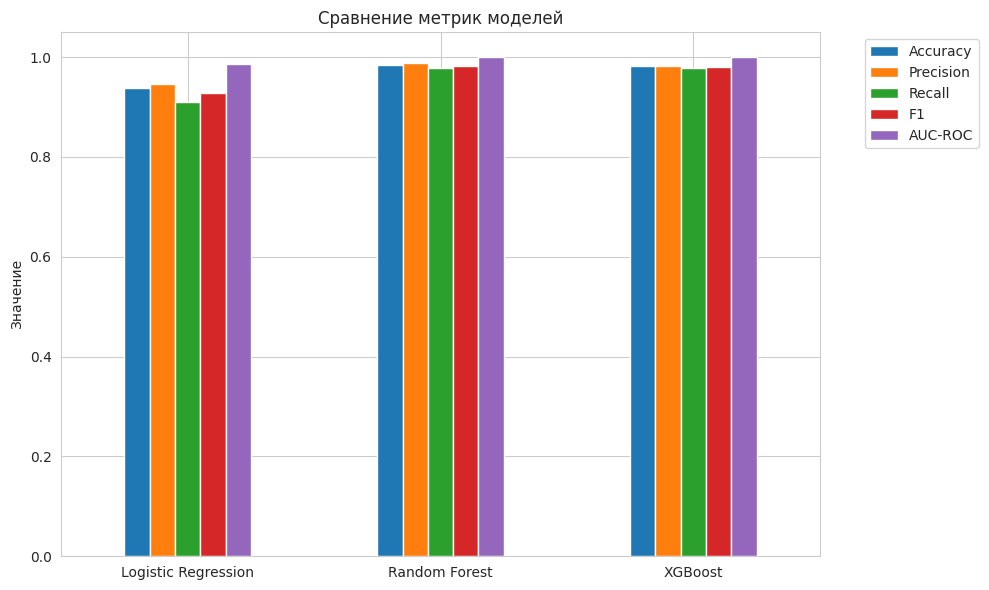

In [234]:
metrics_df = pd.DataFrame({name: res["metrics"] for name, res in results.items()}).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Сравнение метрик моделей")
plt.ylabel("Значение")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Словарь для хранения результатов
results_tuned = {}

# --------------------------------------------------
# 1. Логистическая регрессия
# --------------------------------------------------
print("Подбор гиперпараметров: Logistic Regression...")
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']  # совместим с l2 и небольшими данными
}

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=3, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train, y_train)

y_proba_lr = lr_grid.predict_proba(X_test)[:, 1]
results_tuned["Logistic Regression (tuned)"] = {
    "model": lr_grid.best_estimator_,
    "best_params": lr_grid.best_params_,
    "y_proba": y_proba_lr,
    "auc": roc_auc_score(y_test, y_proba_lr)
}

print("  Лучшие параметры:", lr_grid.best_params_)
print("  AUC:", results_tuned["Logistic Regression (tuned)"]["auc"])


# --------------------------------------------------
# 2. Случайный лес
# --------------------------------------------------
print("\nПодбор гиперпараметров: Random Forest...")
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

y_proba_rf = rf_grid.predict_proba(X_test)[:, 1]
results_tuned["Random Forest (tuned)"] = {
    "model": rf_grid.best_estimator_,
    "best_params": rf_grid.best_params_,
    "y_proba": y_proba_rf,
    "auc": roc_auc_score(y_test, y_proba_rf)
}

print("  Лучшие параметры:", rf_grid.best_params_)
print("  AUC:", results_tuned["Random Forest (tuned)"]["auc"])


# --------------------------------------------------
# 3. XGBoost
# --------------------------------------------------
print("\nПодбор гиперпараметров: XGBoost...")
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='f1', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

y_proba_xgb = xgb_grid.predict_proba(X_test)[:, 1]
results_tuned["XGBoost (tuned)"] = {
    "model": xgb_grid.best_estimator_,
    "best_params": xgb_grid.best_params_,
    "y_proba": y_proba_xgb,
    "auc": roc_auc_score(y_test, y_proba_xgb)
}

print("  Лучшие параметры:", xgb_grid.best_params_)
print("  AUC:", results_tuned["XGBoost (tuned)"]["auc"])

# --------------------------------------------------
# Итоговая таблица AUC
# --------------------------------------------------
print("\n=== ИТОГОВЫЕ AUC ПОСЛЕ ТЮНИНГА ===")
for name, res in results_tuned.items():
    print(f"{name:25} → AUC = {res['auc']:.4f}")

Подбор гиперпараметров: Logistic Regression...
  Лучшие параметры: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
  AUC: 0.7756696428571428

Подбор гиперпараметров: Random Forest...
  Лучшие параметры: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
  AUC: 0.9993912337662337

Подбор гиперпараметров: XGBoost...
  Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
  AUC: 0.999416599025974

=== ИТОГОВЫЕ AUC ПОСЛЕ ТЮНИНГА ===
Logistic Regression (tuned) → AUC = 0.7757
Random Forest (tuned)     → AUC = 0.9994
XGBoost (tuned)           → AUC = 0.9994


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:40:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Лучшая модель для анализа важности: XGBoost (tuned) (AUC = 0.9994)


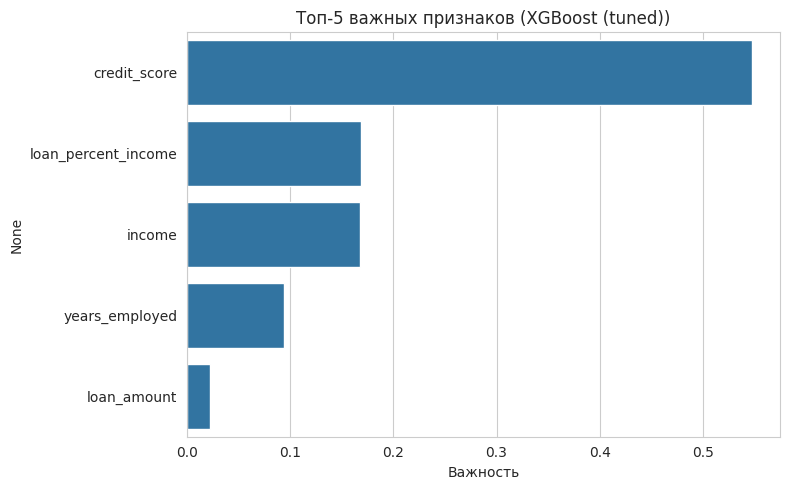


Топ-5 признаков:
credit_score           0.547397
loan_percent_income    0.169059
income                 0.167315
years_employed         0.093968
loan_amount            0.022260
dtype: float32


In [236]:
# Определим, какие модели поддерживают feature_importances_
models_with_importance = ["Random Forest (tuned)", "XGBoost (tuned)"]

# Найдём лучшую по AUC среди них
best_name = None
best_auc = -1
for name in models_with_importance:
    if name in results_tuned:
        auc = results_tuned[name]["auc"]
        if auc > best_auc:
            best_auc = auc
            best_name = name

if best_name is None:
    print("Нет моделей с поддержкой feature_importances_")
else:
    print(f"Лучшая модель для анализа важности: {best_name} (AUC = {best_auc:.4f})")
    best_model = results_tuned[best_name]["model"]
    importances = best_model.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

    # Визуализация
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
    plt.title(f"Топ-5 важных признаков ({best_name})")
    plt.xlabel("Важность")
    plt.tight_layout()
    plt.show()

    print("\nТоп-5 признаков:")
    print(feat_imp.head())

In [237]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Получаем лучшие параметры Random Forest (из tuned-результатов)
best_params_rf = results_tuned["Random Forest (tuned)"]["best_params"]

# Обучаем модель БЕЗ стратификации
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X, y, test_size=0.2, random_state=42  # без stratify!
)
model_ns = RandomForestClassifier(**best_params_rf, random_state=42)
model_ns.fit(X_train_ns, y_train_ns)

# Предсказания
y_pred_ns = model_ns.predict(X_test_ns)
y_proba_ns = model_ns.predict_proba(X_test_ns)[:, 1]

# Расчёт всех метрик
metrics_ns = {
    "Accuracy": accuracy_score(y_test_ns, y_pred_ns),
    "Precision": precision_score(y_test_ns, y_pred_ns),
    "Recall": recall_score(y_test_ns, y_pred_ns),
    "F1": f1_score(y_test_ns, y_pred_ns),
    "AUC-ROC": roc_auc_score(y_test_ns, y_proba_ns)
}

# Вывод
print("=== Метрики модели БЕЗ стратификации ===")
for name, value in metrics_ns.items():
    print(f"{name:10} = {value:.4f}")

print("\n=== Подробный отчёт (classification_report) ===")
print(classification_report(y_test_ns, y_pred_ns))

=== Метрики модели БЕЗ стратификации ===
Accuracy   = 0.9750
Precision  = 0.9727
Recall     = 0.9727
F1         = 0.9727
AUC-ROC    = 0.9980

=== Подробный отчёт (classification_report) ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       217
           1       0.97      0.97      0.97       183

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



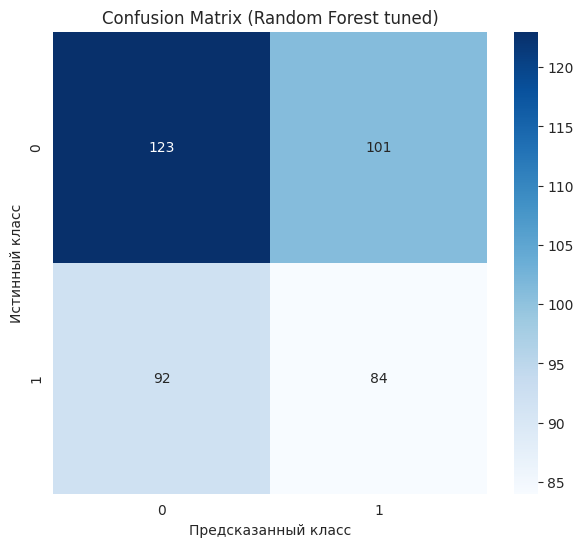

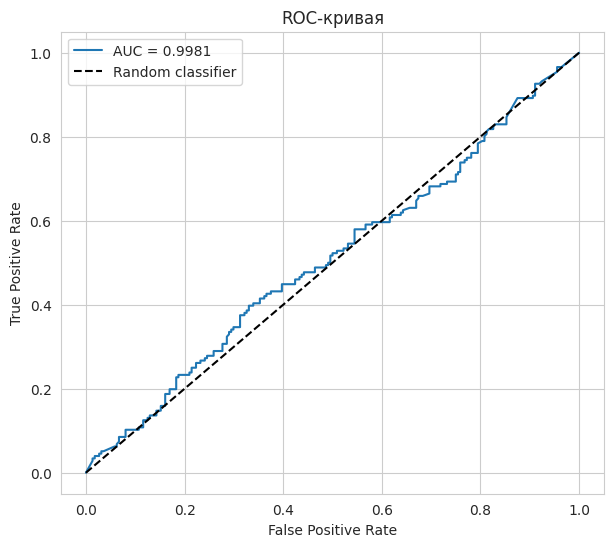

In [238]:
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest tuned)")
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba_tuned)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {tuned_metrics['AUC-ROC']:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.grid(True)
plt.show()

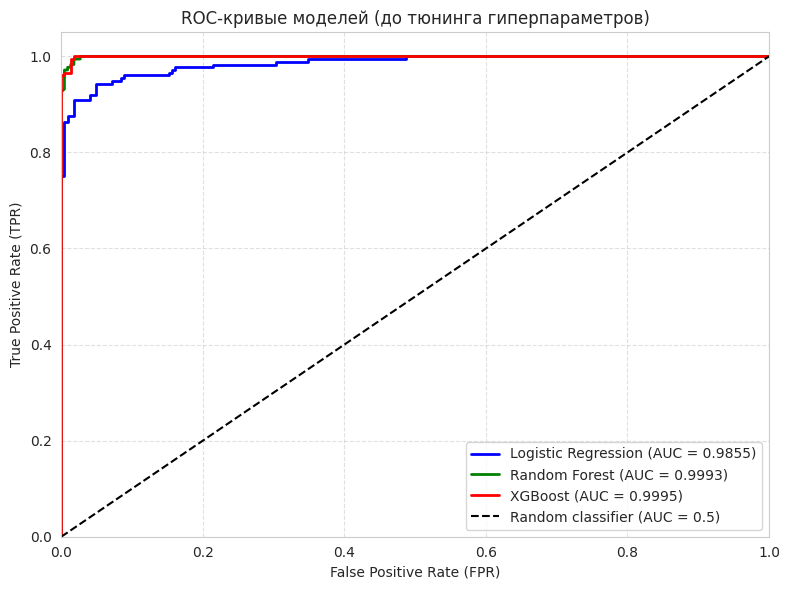

In [239]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Названия моделей до тюнинга
model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
colors = ["blue", "green", "red"]

plt.figure(figsize=(8, 6))

for name, color in zip(model_names, colors):
    if name in results:
        fpr, tpr, _ = roc_curve(y_test, results[name]["y_proba"])
        auc_score = results[name]["metrics"]["AUC-ROC"]
        plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {auc_score:.4f})')
    else:
        print(f"Модель '{name}' не найдена в results")

# Диагональ — случайный классификатор
plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Random classifier (AUC = 0.5)')

# Оформление
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривые моделей (до тюнинга гиперпараметров)')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()